# Web Scrapping in python

# Import all the necessary libraries

!pip install pandas <br>
!pip install bs4 <br>
!pip install requests <br>
#If the packages does not run , make sure the packages are installed

In [11]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup # Library for Parsing HTML and XMl documents, allowing us to extract the data
import requests # Library used to send HTTP requests and handle response time in python
import html5lib

# Retrieve the HTML content from a webpage, extracts the relevant table using BeautifulSoup

Here is the link to parse : http://espn.go.com/nfl/superbowl/history/winners

In [12]:
url = "http://espn.go.com/nfl/superbowl/history/winners"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
soup 


<!DOCTYPE html>

<html xmlns:fb="https://www.facebook.com/2008/fbml">
<head>
<script>
(function redirectToHttpIfHttps() {
   var win      = typeof window !== 'undefined' && window,
       location = win && win.location,
       protocol = location && location.protocol;

   if (protocol === 'https:' && !false) {
        location.href = location.href.replace('https://', 'http://');
   }
})();
</script><meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://a.espncdn.com/favicon.ico" mask="" rel="icon" sizes="any"/>
<meta content="#CC0000" name="theme-color"/>
<script type="text/javascript">
    if(true && navigator && navigator.userAgent.toLowerCase().indexOf("teamstream") >= 0) {
        window.location = 'http://m.espn.com/mobilecache/general/apps/sc';
    }
</script><script src="https://dcf.espn.com/TWDC-DTCI/prod/Bootstrap.js" type="text/javascript"></script><title>Super Bowl Winners and Results - Super Bowl History - National Footb

# Look for the html tag “table” on the page to extract the table from the page.

In [16]:
sb_table = soup.find('table')
sb_table
sb = pd.read_html(str(sb_table))[0]
sb.head()

,0,1,2,3
0,Super Bowl Winners and Results,Super Bowl Winners and Results,Super Bowl Winners and Results,Super Bowl Winners and Results
1,NO.,DATE,SITE,RESULT
2,I,"Jan. 15, 1967",Los Angeles Memorial Coliseum,"Green Bay 35, Kansas City 10"
3,II,"Jan. 14, 1968",Orange Bowl (Miami),"Green Bay 33, Oakland 14"
4,III,"Jan. 12, 1969",Orange Bowl (Miami),"New York Jets 16, Baltimore 7"


# Drop the first two rows from the sb DataFrame, reset the index, rename the column names to "number", "date", "site", and "result", and then create a new DataFrame sb (which is essentially the same as the original sb DataFrame).

In [17]:
sb = sb.drop([0,1]).reset_index(drop = True)
sb.columns = ["number", "date", "site", "result"]
sb = pd.DataFrame(sb)
sb.head()

,number,date,site,result
0,I,"Jan. 15, 1967",Los Angeles Memorial Coliseum,"Green Bay 35, Kansas City 10"
1,II,"Jan. 14, 1968",Orange Bowl (Miami),"Green Bay 33, Oakland 14"
2,III,"Jan. 12, 1969",Orange Bowl (Miami),"New York Jets 16, Baltimore 7"
3,IV,"Jan. 11, 1970",Tulane Stadium (New Orleans),"Kansas City 23, Minnesota 7"
4,V,"Jan. 17, 1971",Orange Bowl (Miami),"Baltimore 16, Dallas 13"


# Now Its time to Clean the Data to your Requirements

# Replace the roman numerals with integers, just by noting that the superbowl number is just the same as the row number.

In [20]:
sb["number"] = range(len(sb))
sb.head()

,number,date,site,result
0,0,"Jan. 15, 1967",Los Angeles Memorial Coliseum,"Green Bay 35, Kansas City 10"
1,1,"Jan. 14, 1968",Orange Bowl (Miami),"Green Bay 33, Oakland 14"
2,2,"Jan. 12, 1969",Orange Bowl (Miami),"New York Jets 16, Baltimore 7"
3,3,"Jan. 11, 1970",Tulane Stadium (New Orleans),"Kansas City 23, Minnesota 7"
4,4,"Jan. 17, 1971",Orange Bowl (Miami),"Baltimore 16, Dallas 13"


# Convert the values in the 'date' column of the DataFrame sb from their current format to the datetime format, assuming the format of the values is month/day/year.

In [21]:
sb["date"] = pd.to_datetime(sb['date']).dt.strftime("%m/%d/%y")
sb.head()

,number,date,site,result
0,0,01/15/67,Los Angeles Memorial Coliseum,"Green Bay 35, Kansas City 10"
1,1,01/14/68,Orange Bowl (Miami),"Green Bay 33, Oakland 14"
2,2,01/12/69,Orange Bowl (Miami),"New York Jets 16, Baltimore 7"
3,3,01/11/70,Tulane Stadium (New Orleans),"Kansas City 23, Minnesota 7"
4,4,01/17/71,Orange Bowl (Miami),"Baltimore 16, Dallas 13"


# Extract and store the stadium and city information separately from the 'site' column. In summary split the 'site' column in the DataFrame sb based on the characters '[' and ']' and assigns the resulting parts to separate columns: 'stadium', 'city', and the remaining part.

In [23]:
sb[['stadium', 'city', '_']] = sb['site'].str.split('[()]', expand = True)
sb.head()

,number,date,site,result,stadium,city,_
0,0,01/15/67,Los Angeles Memorial Coliseum,"Green Bay 35, Kansas City 10",Los Angeles Memorial Coliseum,None,None
1,1,01/14/68,Orange Bowl (Miami),"Green Bay 33, Oakland 14",Orange Bowl,Miami,
2,2,01/12/69,Orange Bowl (Miami),"New York Jets 16, Baltimore 7",Orange Bowl,Miami,
3,3,01/11/70,Tulane Stadium (New Orleans),"Kansas City 23, Minnesota 7",Tulane Stadium,New Orleans,
4,4,01/17/71,Orange Bowl (Miami),"Baltimore 16, Dallas 13",Orange Bowl,Miami,


In [24]:
sb1 = sb.drop(columns = ["_"])
sb1.head()

,number,date,site,result,stadium,city
0,0,01/15/67,Los Angeles Memorial Coliseum,"Green Bay 35, Kansas City 10",Los Angeles Memorial Coliseum,None
1,1,01/14/68,Orange Bowl (Miami),"Green Bay 33, Oakland 14",Orange Bowl,Miami
2,2,01/12/69,Orange Bowl (Miami),"New York Jets 16, Baltimore 7",Orange Bowl,Miami
3,3,01/11/70,Tulane Stadium (New Orleans),"Kansas City 23, Minnesota 7",Tulane Stadium,New Orleans
4,4,01/17/71,Orange Bowl (Miami),"Baltimore 16, Dallas 13",Orange Bowl,Miami


# Split the 'result' column in the DataFrame sb based on the separator ', ' (comma followed by a space) and creates two new columns: 'winner' and 'loser'. 

In [25]:
sb1[["winner", 'loser']] = sb1['result'].str.split(', ', expand=True)
sb1

,number,date,site,result,stadium,city,winner,loser
0,0,01/15/67,Los Angeles Memorial Coliseum,"Green Bay 35, Kansas City 10",Los Angeles Memorial Coliseum,None,Green Bay 35,Kansas City 10
1,1,01/14/68,Orange Bowl (Miami),"Green Bay 33, Oakland 14",Orange Bowl,Miami,Green Bay 33,Oakland 14
2,2,01/12/69,Orange Bowl (Miami),"New York Jets 16, Baltimore 7",Orange Bowl,Miami,New York Jets 16,Baltimore 7
3,3,01/11/70,Tulane Stadium (New Orleans),"Kansas City 23, Minnesota 7",Tulane Stadium,New Orleans,Kansas City 23,Minnesota 7
4,4,01/17/71,Orange Bowl (Miami),"Baltimore 16, Dallas 13",Orange Bowl,Miami,Baltimore 16,Dallas 13
5,5,01/16/72,Tulane Stadium (New Orleans),"Dallas 24, Miami 3",Tulane Stadium,New Orleans,Dallas 24,Miami 3
6,6,01/14/73,Los Angeles Memorial Coliseum,"Miami 14, Washington 7",Los Angeles Memorial Coliseum,None,Miami 14,Washington 7
7,7,01/13/74,Rice Stadium (Houston),"Miami 24, Minnesota 7",Rice Stadium,Houston,Miami 24,Minnesota 7
8,8,01/12/75,Tulane Stadium (New Orleans),"Pittsburgh 16, Minnesota 6",Tulane Stadium,New Orleans,Pittsburgh 16,Minnesota 6
9,9,01/18/76,Orange Bowl (Miami),"Pittsburgh 21, Dallas 17",Orange Bowl,Miami,Pittsburgh 21,Dallas 17


# Extract the numeric part from the 'winner' column and assigns it to a new column called 'winnerscore', and remove the numeric part from the 'winner' column.

In [27]:
import re

pattern = r' (\d+)$'
sb1['winnerscore'] = sb1['winner'].str.extract(pattern).astype(int)
sb1['winner'] = sb1['winner'].str.replace(pattern ,'')
sb1.head()

/var/folders/c9/4f4vlrlx5mn3xqn9hx9_72440000gn/T/ipykernel_17452/112756598.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  sb1['winner'] = sb1['winner'].str.replace(pattern ,'')


,number,date,site,result,stadium,city,winner,loser,winnerscore
0,0,01/15/67,Los Angeles Memorial Coliseum,"Green Bay 35, Kansas City 10",Los Angeles Memorial Coliseum,None,Green Bay,Kansas City 10,35
1,1,01/14/68,Orange Bowl (Miami),"Green Bay 33, Oakland 14",Orange Bowl,Miami,Green Bay,Oakland 14,33
2,2,01/12/69,Orange Bowl (Miami),"New York Jets 16, Baltimore 7",Orange Bowl,Miami,New York Jets,Baltimore 7,16
3,3,01/11/70,Tulane Stadium (New Orleans),"Kansas City 23, Minnesota 7",Tulane Stadium,New Orleans,Kansas City,Minnesota 7,23
4,4,01/17/71,Orange Bowl (Miami),"Baltimore 16, Dallas 13",Orange Bowl,Miami,Baltimore,Dallas 13,16


# Task
# Extract the numeric part from the 'loser' column and assigns it to a new column called 'losercore', and remove the numeric part from the 'loser' column.

In [28]:
sb1['loserscore'] = sb1['loser'].str.extract(pattern).astype(int)
sb1['loser'] = sb1['loser'].str.replace(pattern ,'')
sb1.head()

/var/folders/c9/4f4vlrlx5mn3xqn9hx9_72440000gn/T/ipykernel_17452/1885877539.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  sb1['loser'] = sb1['loser'].str.replace(pattern ,'')


,number,date,site,result,stadium,city,winner,loser,winnerscore,loserscore
0,0,01/15/67,Los Angeles Memorial Coliseum,"Green Bay 35, Kansas City 10",Los Angeles Memorial Coliseum,None,Green Bay,Kansas City,35,10
1,1,01/14/68,Orange Bowl (Miami),"Green Bay 33, Oakland 14",Orange Bowl,Miami,Green Bay,Oakland,33,14
2,2,01/12/69,Orange Bowl (Miami),"New York Jets 16, Baltimore 7",Orange Bowl,Miami,New York Jets,Baltimore,16,7
3,3,01/11/70,Tulane Stadium (New Orleans),"Kansas City 23, Minnesota 7",Tulane Stadium,New Orleans,Kansas City,Minnesota,23,7
4,4,01/17/71,Orange Bowl (Miami),"Baltimore 16, Dallas 13",Orange Bowl,Miami,Baltimore,Dallas,16,13


# Task : Plot a scatterplot of date vs margin of win (winner score minus loser score).

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib qt

In [30]:
sb1['margin_of_win'] = sb1 ['winnerscore'] - sb1['loserscore']
sb1.head()

,number,date,site,result,stadium,city,winner,loser,winnerscore,loserscore,margin_of_win
0,0,01/15/67,Los Angeles Memorial Coliseum,"Green Bay 35, Kansas City 10",Los Angeles Memorial Coliseum,None,Green Bay,Kansas City,35,10,25
1,1,01/14/68,Orange Bowl (Miami),"Green Bay 33, Oakland 14",Orange Bowl,Miami,Green Bay,Oakland,33,14,19
2,2,01/12/69,Orange Bowl (Miami),"New York Jets 16, Baltimore 7",Orange Bowl,Miami,New York Jets,Baltimore,16,7,9
3,3,01/11/70,Tulane Stadium (New Orleans),"Kansas City 23, Minnesota 7",Tulane Stadium,New Orleans,Kansas City,Minnesota,23,7,16
4,4,01/17/71,Orange Bowl (Miami),"Baltimore 16, Dallas 13",Orange Bowl,Miami,Baltimore,Dallas,16,13,3


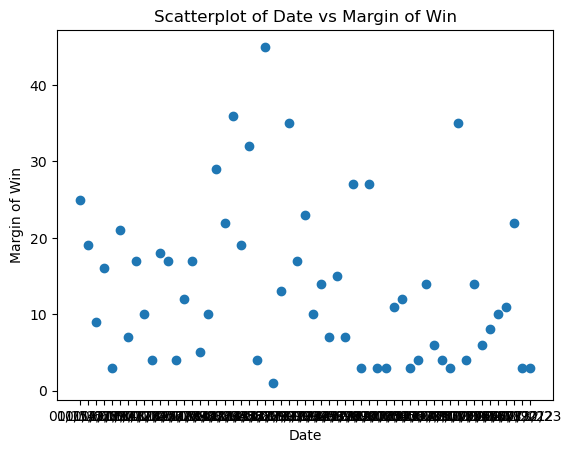

In [41]:
plt.scatter(sb1['date'], sb1['margin_of_win'])
plt.xlabel("Date")
plt.ylabel('Margin of Win')
plt.title('Scatterplot of Date vs Margin of Win')
plt.show()